In [48]:
#Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [49]:
#Defenir e combinar os DataFrames
df_mat = pd.read_csv("student-mat.csv")
df_por = pd.read_csv("student-por.csv")
df_mat['subject'] = 'mat'
df_por['subject'] = 'por'
df = pd.concat([df_mat, df_por], ignore_index=True)

In [50]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,mat
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,mat
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,mat
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,mat
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,mat


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [52]:
#Verificar valores nulos
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
subject       0
dtype: int64

In [53]:
#Criar coluna de consumo médio
df['consumo_medio'] = (df['Dalc'] + df['Walc']) / 2

In [54]:
#Adicionar categoria ao consumo médio
bins = [0, 1.5, 3, 5]
labels = ['baixo', 'medio', 'alto']
if 'consumo_medio' in df.columns:
    df['consumo_cat'] = pd.cut(df['consumo_medio'], bins=bins, labels=labels, include_lowest=True)

In [55]:
#Adicionar uma coluna em binario para as colunas boleanas
for col in ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher']:
    if col in df.columns:
        df[col+'_b'] = df[col].map({'yes':1, 'no':0})

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   school         1044 non-null   object  
 1   sex            1044 non-null   object  
 2   age            1044 non-null   int64   
 3   address        1044 non-null   object  
 4   famsize        1044 non-null   object  
 5   Pstatus        1044 non-null   object  
 6   Medu           1044 non-null   int64   
 7   Fedu           1044 non-null   int64   
 8   Mjob           1044 non-null   object  
 9   Fjob           1044 non-null   object  
 10  reason         1044 non-null   object  
 11  guardian       1044 non-null   object  
 12  traveltime     1044 non-null   int64   
 13  studytime      1044 non-null   int64   
 14  failures       1044 non-null   int64   
 15  schoolsup      1044 non-null   object  
 16  famsup         1044 non-null   object  
 17  paid           1044 non-null   ob

In [57]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,G3,subject,consumo_medio,consumo_cat,schoolsup_b,famsup_b,paid_b,activities_b,nursery_b,higher_b
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,6,mat,1.0,baixo,1,0,0,0,1,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,6,mat,1.0,baixo,0,1,0,0,0,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,10,mat,2.5,medio,1,0,1,0,1,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,15,mat,1.0,baixo,0,1,1,1,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,10,mat,1.5,baixo,0,1,1,0,1,1


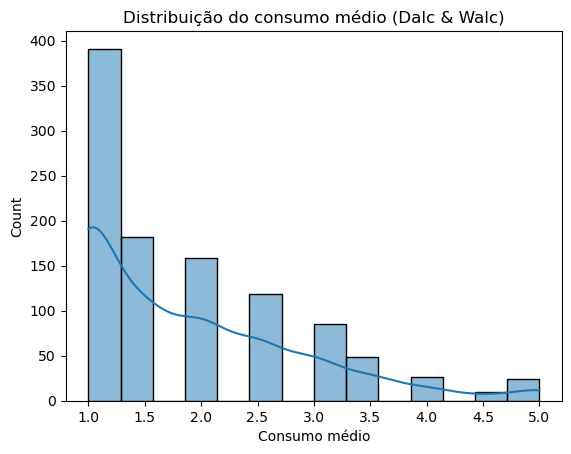

In [58]:

plt.figure()
sns.histplot(df['consumo_medio'], kde=True)
plt.title('Distribuição do consumo médio (Dalc & Walc)')
plt.xlabel('Consumo médio')
plt.show()

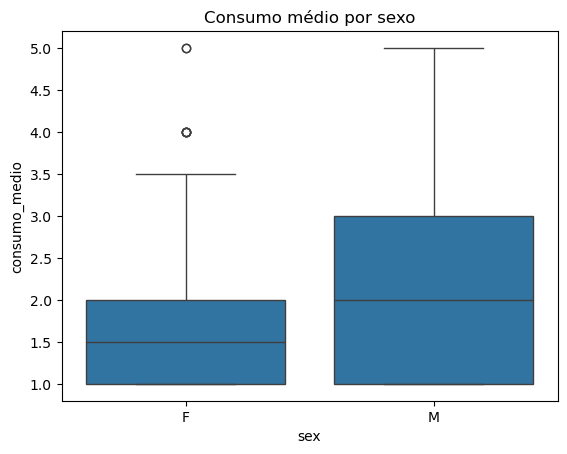

In [59]:
plt.figure()
sns.boxplot(data=df, x='sex', y='consumo_medio')
plt.title('Consumo médio por sexo')
plt.show()

C:\Users\SIA_3\AppData\Local\Temp\ipykernel_23520\3108784679.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby('consumo_cat')['G3'].describe())


,count,mean,std,min,25%,50%,75%,max
consumo_cat,,,,,,,,
baixo,573.0,11.769634,3.973600,0.0,10.0,12.0,14.0,20.0
medio,362.0,10.944751,3.686802,0.0,9.0,11.0,13.0,19.0
alto,109.0,10.412844,3.580324,0.0,9.0,11.0,12.0,18.0


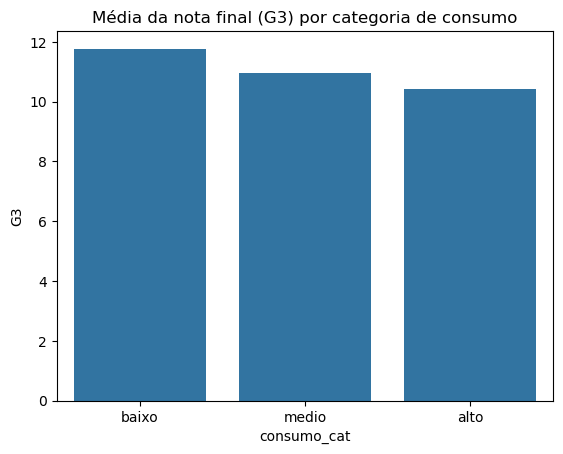

In [60]:
display(df.groupby('consumo_cat')['G3'].describe())
plt.figure()
sns.barplot(x='consumo_cat', y='G3', data=df, errorbar=None)
plt.title('Média da nota final (G3) por categoria de consumo')
plt.show()

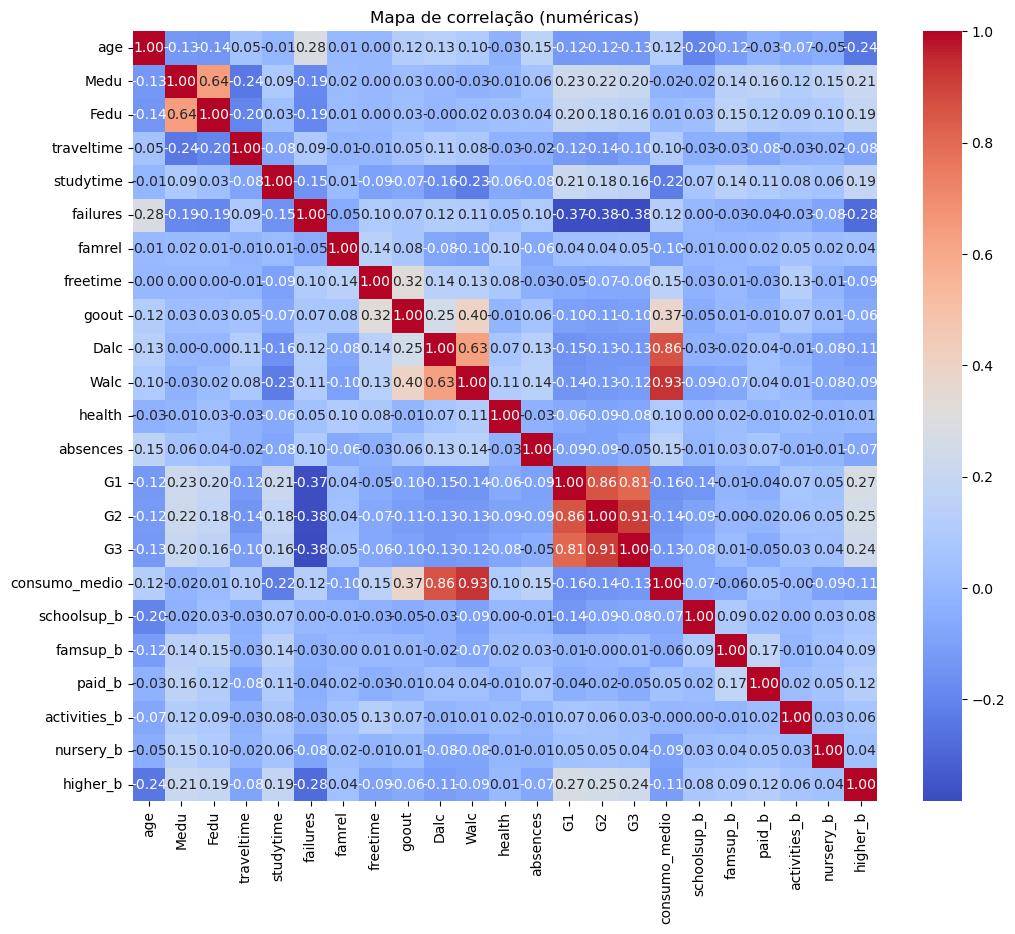

In [61]:
num = df.select_dtypes(include=np.number)
plt.figure(figsize=(12,10))
corr = num.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Mapa de correlação (numéricas)')
plt.show()

sex,F,M
age,,
15,1.605263,1.727273
16,1.594340,2.135246
17,1.640351,2.603774
18,1.527559,2.578947
19,1.848485,1.869565


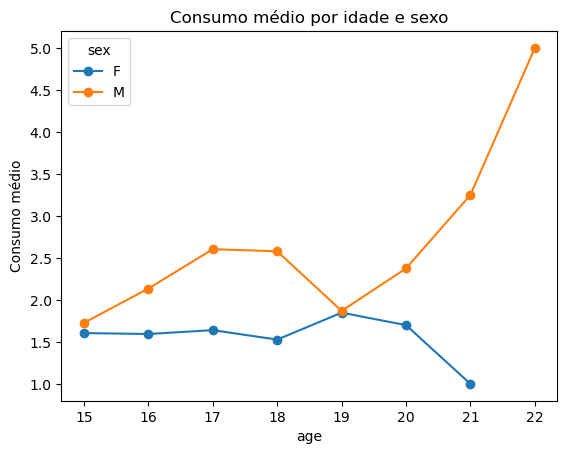

In [62]:
pivot = df.pivot_table(index='age', columns='sex', values='consumo_medio', aggfunc='mean')
display(pivot.head())
pivot.plot(marker='o')
plt.title('Consumo médio por idade e sexo')
plt.ylabel('Consumo médio')
plt.show()

In [63]:
#Exportar o df para csv
df.to_csv('dados_estudantes.csv', index=False)